In [15]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import h3
from geopy.distance import geodesic

In [462]:
ford_data= pd.read_csv('201902-fordgobike-tripdata.csv')

data.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [463]:
df=ford_data.copy()

In [464]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

Considering that the sum of missing values is relatively small compared to our data set (183,412 rows), we will be dropping the rows with missing values.

In [25]:
df= df.dropna()

In [26]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [29]:
print(df.shape)
print(df.dtypes)

(174952, 16)
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object


> Start and end time are an object rather than a DateTime object. 

> Birth year is a float, when it should be an int. 

> All id's (start/end station, bike) should are numerical when they should be strings/categorical.

In [30]:
df['start_time']= pd.to_datetime(df.start_time)
df['end_time']= pd.to_datetime(df.end_time)
df['member_birth_year']=df['member_birth_year'].astype('int')
df['start_station_id']=df['start_station_id'].astype('str')
df['end_station_id']=df['end_station_id'].astype('str')
df['bike_id']=df['bike_id'].astype('str')

In [198]:
df.dtypes

start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
end_station_id                     object
end_station_name                   object
bike_id                            object
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
duration_min                      float64
distance                          float64
age                                 int64
day_start                          object
day_end                            object
dtype: object

> Great! We have succesfully handled data types.

In [32]:
df.duplicated().sum()

0

In [33]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


### Structure of this dataset:
This set contains 174,952 entries all belonging to February of 2019. In total this set contains 16 features/columns (duration, start time, end time, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude, end station longitude, bike id, user type, member birth year, member gender, bike share for all). There is a mix between numeric and categorical variables.

#### Main interest in this dataset:
The main features of interest I have for this dataset is finding which type of user is most likely to be renting FordGoBike's, as well as figuring out the general behaviors when renting a bike (usual duration, distance between stations) and how they relate to user type.

#### Features that will prove most useful:
The features of this data set I believe will prove to be the most useful for the purposes of my analysis are:
* **Longitude and latitude:** to assess distance between stations/distance traveled
* **Duration**: to understand how duration may relate to the general demographics of users if at all. 
* **Gender:** to understand if gender has an impact on duration/distance
* **Birth year:** to assess which generation is most likely to use FordGoBikes. 
* **Start and end time:** the time will help me understand whether weekdays/weekends bring more business and the time of the most active hours of the day.

### Further wrangling: 

In [72]:
df['age']= 2019-df['member_birth_year']
df.age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

> The age max is 141, which is not possible. It is safe to say that people over 90 years old are not renting bikes, so we will be dropping those rows. 

In [90]:
show= df[df.age>=90].index
df=df.drop(show, axis=0)

In [91]:
df[df.age>=90]

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,distance,age


> Great, now that we have dropped that row, we can move on to turning the duration from seconds to minutes

In [35]:
#changing seconds to minutes
df['duration_min']= df['duration_sec']/60
df.drop('duration_sec', axis=1, inplace=True)

In [36]:
df.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.750000
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.900000
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.166667
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.416667
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,29.883333


In [37]:
#We take the start adn end longitude and latitude to calculate the distance traveled from stations.
df['distance'] = df.apply((lambda row: geodesic((row['start_station_latitude'], row['start_station_longitude']),(row['end_station_latitude'], row['end_station_longitude'])).miles),axis=1)

In [38]:
df.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,distance
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.750000,0.338015
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.900000,1.681051
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.166667,0.162113
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.416667,1.498758
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,29.883333,2.068083


> the purpose of start/end longitude and latitude for this analysis was to calculate distance, now that we have that we have done that, we can drop these columns.

In [40]:
df= df.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis=1)
df.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,distance
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,869.750000,0.338015
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,1030.900000,1.681051
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,608.166667,0.162113
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,26.416667,1.498758
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,29.883333,2.068083


## Exploratory Visualization:

#### Which gender is most likely to rent from FordGoBike?

In [83]:
males= df.query('member_gender == "Male"')
females= df.query('member_gender == "Female"')
other= df.query('member_gender == "Other"')

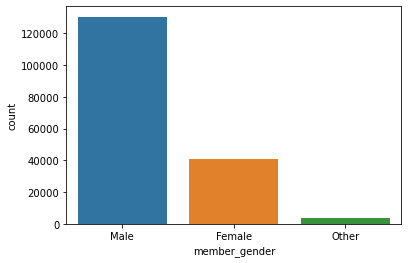

In [64]:
sb.countplot(data=df,x='member_gender',order=['Male','Female','Other']);

> As we can see the majority of FordGoBike customers in February, 2019 were male. Now, let's take a deeper look into demographics. 

#### Do certain age groups rent FordGoBike more often?

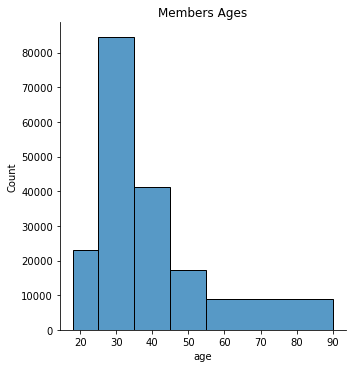

In [111]:
bins=[18,25,35,45,55,90]
labels= ['18-25','26-35','36-45','46-55','56+']
sb.displot(df['age'], bins=bins).set(title='Members Ages');

> As we can see, the majority consumers fall between the mid-20's to mid-30's category.

#### Are bike rentals more common on weekdays or weekends?

In [129]:
df["day_start"] = df["start_time"].dt.weekday
df["day_end"]= df["end_time"].dt.weekday

In [130]:
#converting day numbers to the actual name of the day
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_start'] = df['day_start'].map(days)
df['day_end'] = df['day_end'].map(days)
df.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,distance,age,day_start,day_end
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,869.750000,0.338015,35,Thursday,Friday
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,1030.900000,1.681051,47,Thursday,Friday
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,608.166667,0.162113,30,Thursday,Friday
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,26.416667,1.498758,45,Thursday,Friday
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,29.883333,2.068083,60,Thursday,Friday


In [134]:
print(df.day_start.value_counts())
print(df.day_end.value_counts())

Thursday     33705
Tuesday      30567
Wednesday    28415
Friday       27644
Monday       25630
Sunday       14504
Saturday     14410
Name: day_start, dtype: int64
Thursday     33700
Tuesday      30574
Wednesday    28406
Friday       27636
Monday       25630
Sunday       14511
Saturday     14418
Name: day_end, dtype: int64


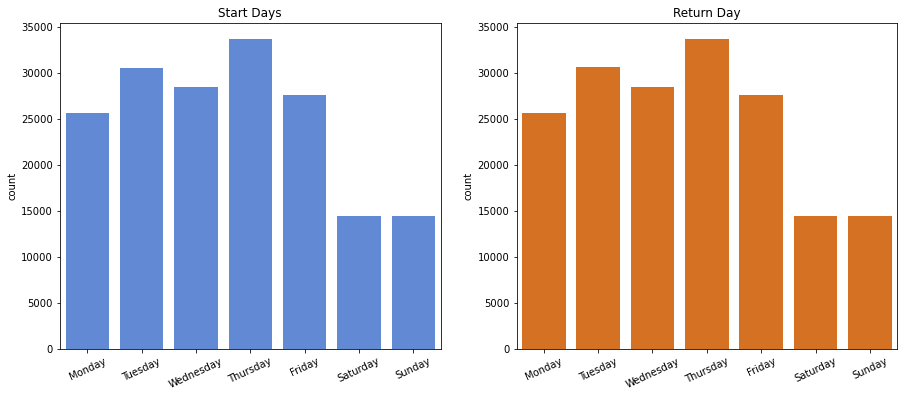

In [152]:
orders= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sb.countplot(data=df, x='day_start',order=orders, color='#4F83E6').set(title='Start Days', xlabel='');
plt.xticks(rotation=25)
plt.subplot(1,2,2)
sb.countplot(data=df, x='day_end',order=orders, color='#F36D04').set(title='Return Day', xlabel='');
plt.xticks(rotation=25)
plt.show()

> As we can see, the most common day to rent and return a bike in February of 2019 was Thursday followed by Tuesday. As we can see the plots for both start and return day are pretty much identical. 

#### How many users of FordGoBike were subscribers?

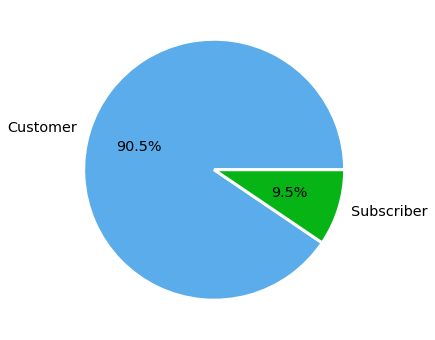

In [174]:
plt.figure(figsize=[6,6])
plt.pie(df['user_type'].value_counts(), labels=['Customer','Subscriber'],autopct='%1.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},textprops={'size': 'x-large'},colors=['#5AADEA','#06B416']);

#### What is the most common station to rent and return?

In [197]:
#we get the top 5 most frequented starts/end stations.
pop_start=df['start_station_id'].value_counts()[:5]
pop_end= df['end_station_id'].value_counts()[:5]
print(pop_start)
print(pop_end)

58.0    3649
67.0    3406
81.0    2951
21.0    2709
3.0     2620
Name: start_station_id, dtype: int64
67.0    4621
58.0    3709
21.0    3460
15.0    3151
30.0    2860
Name: end_station_id, dtype: int64


> with this simple code we can see that there are 3 stations that overlapse in start and end station: 58.0, 67.0, and 21.0. 

In [230]:
pop_stations_start= df.query('start_station_id== "58.0"|start_station_id== "67.0"|start_station_id== "81.0"|start_station_id== "21.0"|start_station_id== "3.0"')
pop_stations_end=df.query('end_station_id== "58.0"|end_station_id== "67.0"|end_station_id== "21.0"|end_station_id== "30.0"|end_station_id== "15.0"')

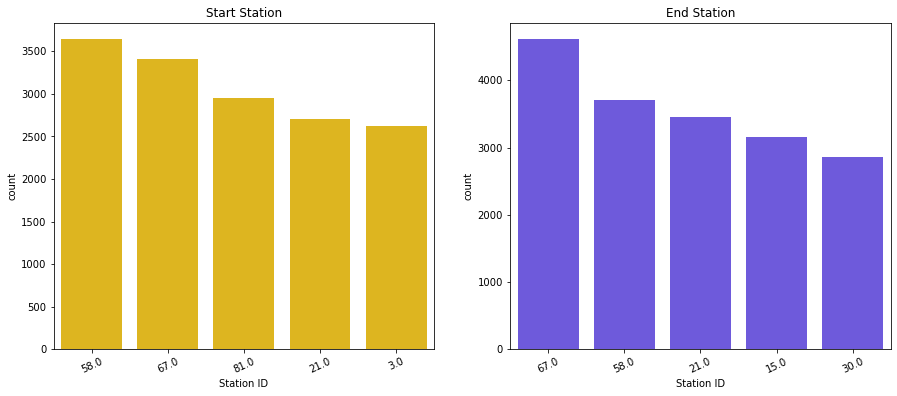

In [244]:
order_s= ['58.0','67.0','81.0','21.0','3.0']
order_e=['67.0','58.0','21.0','15.0','30.0']
labels_start= ['58.0, Market St at 10th St','67.0 San Francisco Caltrain Station 2','81.0, Berry St at 4th St','21.0, Montgomery St BART Station','3.0, Powell St BART Station']
labeles_end= ['67.0, San Francisco Caltrain Station 2','58.0, Market St at 10th St','21.0, Montgomery St BART Station','15.0, San Francisco Ferry Building', '30.0, San Francisco Caltrain']
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sb.countplot(data=pop_stations_start,x='start_station_id', order=order_s,color='#FCC700').set(title='Start Station',xlabel='Station ID')
plt.xticks(rotation=25)
plt.subplot(1,2,2)
sb.countplot(data=pop_stations_end,x='end_station_id',order=order_e, color='#5F45F0').set(title='End Station',xlabel='Station ID')
plt.xticks(rotation=25)
plt.show()

As we can see, the stations *58.0, 67.0, and 21.0* are amongst the most popular stations to rent and return. How is this relevant? Knowing how frequented each station is helps us determine how bikes should be distributed across the city.

## Bivariate visualzation:

#### User type and popular stations

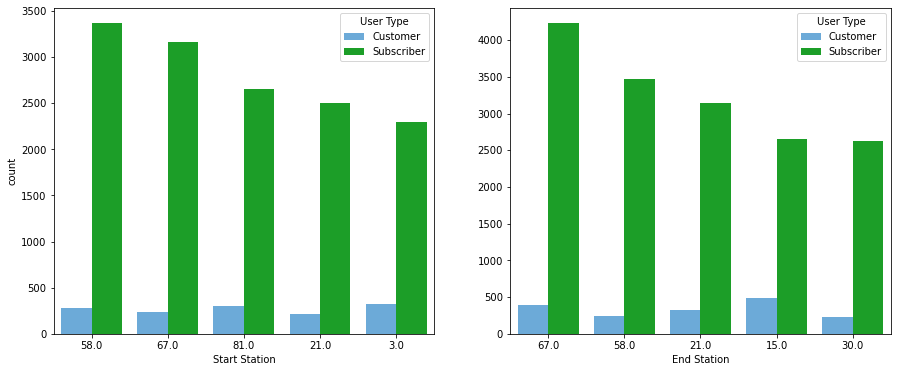

In [415]:
order_s= ['58.0','67.0','81.0','21.0','3.0']
order_e=['67.0','58.0','21.0','15.0','30.0']
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sb.countplot(data=pop_stations_start,x='start_station_id', hue='user_type', order=order_s,palette=['#5AADEA','#06B416'])
plt.legend(title='User Type')
plt.xlabel('Start Station')
plt.subplot(1,2,2)
sb.countplot(data=pop_stations_end,x='end_station_id', hue='user_type',order=order_e, palette=['#5AADEA','#06B416'])
plt.legend(title='User Type')
plt.xlabel('End Station')
plt.ylabel('')
plt.show()

>Wow! Interestingly although they make up for only 9.5% of users, subscribers are the ones who most frequently rent and return in the popular stations.

#### Does gender impact the distance traveled from start ot end station?:

In [287]:
df[df.distance>15]

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,distance,age,day_start,day_end
112038,2019-02-12 14:28:44.402,2019-02-12 16:24:30.158,21.0,Montgomery St BART Station (Market St at 2nd St),300.0,Palm St at Willow St,4780,Subscriber,1985,Female,No,115.75,43.164157,34,Tuesday,Tuesday


As we can see, there's an outlier in distance. A female who returned her bike 43 miles away from the starting point. We will be ignoring this row to analyze distance.

In [289]:
distances= df[df.distance<15]

[Text(0.5, 1.0, 'Gender and Distance')]

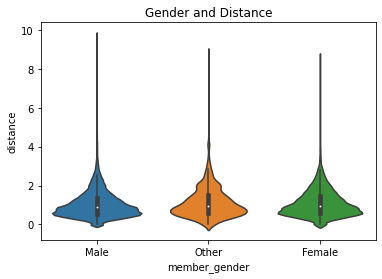

In [317]:
sb.violinplot(data=distances, x='member_gender',y='distance').set(title='Gender and Distance')

We can see that the average distance traveled from start station to end station by all genders is less than 2 miles. Based on this graph, there seems to be little to no relationship between distance and gender.

#### Do subscribers ride longer? 

In [319]:
df.duration_min.describe()

count    174875.000000
mean         11.733800
std          27.375632
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

As we can see, there is an outlier when it comes to duration, with a total time of 1,409 minutes. To make a more accurate visualization we need to get rid of extreme values. 

In [327]:
av_duration= df[df.duration_min<50]

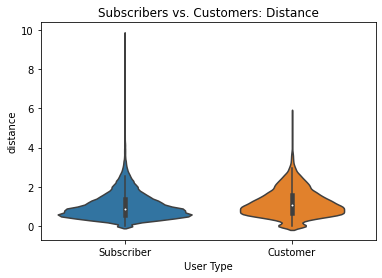

In [331]:
sb.violinplot(data=av_duration, x='user_type',y='distance').set(title='Subscribers vs. Customers: Distance', xlabel='User Type');

As we can see, subscribers usually rent bikes for shorter distances than customers. 

#### How do gender and age interact in relation to FordGoBike's rentals?

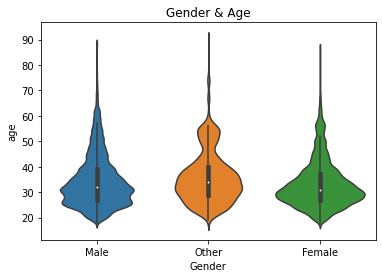

In [193]:
sb.violinplot(data=df,x='member_gender', y='age').set(title='Gender & Age', xlabel= 'Gender');

#### Does gender relate to duration?

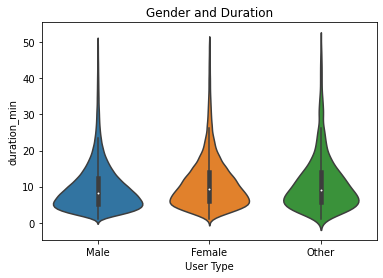

In [350]:
sb.violinplot(data=av_duration, x='member_gender',y='duration_min',).set(title='Gender and Duration', xlabel='User Type');

It appears that there is a relationship between gender and duration. Females and others have an overall larger duration on rentals than males. 

#### Relationship between subscription and bike share program:

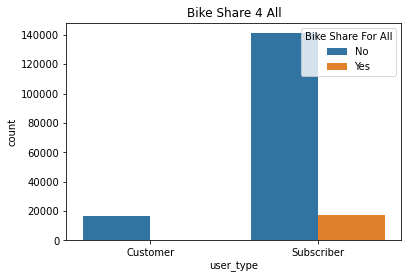

In [358]:
sb.countplot(data=df,x='user_type',hue='bike_share_for_all_trip').set(title='Bike Share 4 All');
plt.legend(title='Bike Share For All' )
plt.show()

#### How does gender relate to subscription?

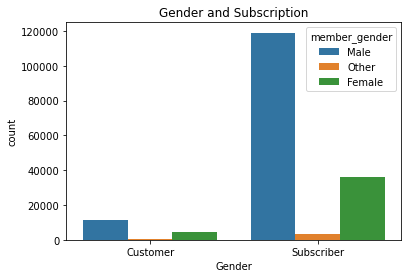

In [177]:
sb.countplot(data=df, x='user_type', hue='member_gender').set(title='Gender and Subscription', xlabel='Gender');

As we can see, the average female renter seems to be younger that the average male or the people who identify as other genders. 
* **Males:** males are more likely to be in their mid-20s and early 30s.
* **Other:** people who identified as other gender, tend to be older than the average females and males who rent. Usually, they fall in their mid-30s.
* **Females:** Females who use FordGoBike predominantly fall in the mid-20s to 30s range. 

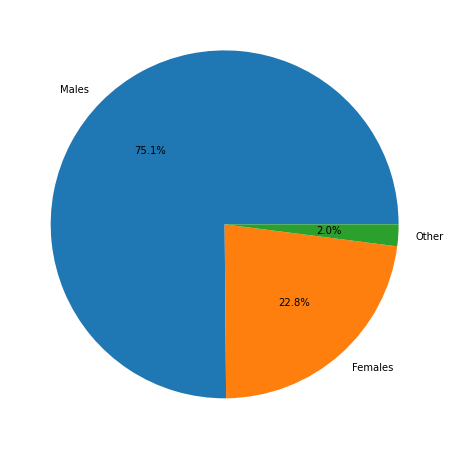

In [394]:
subscribers= df.query('user_type=="Subscriber"')
gender = subscribers.member_gender.value_counts()
labels= ['Males','Females','Other']
plt.figure(figsize=[8,8])
plt.pie(gender, labels=labels,autopct='%1.1f%%');

As expected given the demographics observed in this dataset, the majority of subscribers are Males. 

#### Does age relate to duration:

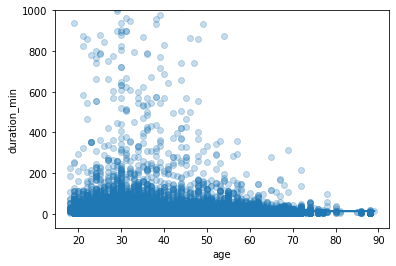

In [372]:
sb.regplot(data=df, x='age', y='duration_min',scatter_kws={'alpha':1/4});
plt.ylim(ymax=1000)
plt.show()

As we can see from this plot, people in their 30s seem to rent FordGoBiked for the longest time.
Why is this important? 30 year-olds have stuck out throughout this analysis, it is important to keep an eye out and see if this data is consistent with other months/years. If so, this data could inform future marketing campaigns.

### Multivariate Visualization:

#### How do age and gender relate to the station where bikes are rented? 

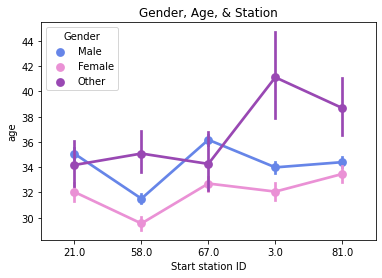

In [384]:
sb.pointplot(data=pop_stations_start, x='start_station_id', y='age', hue='member_gender', palette=['#6685E8','#EA91D5','#9948B3']).set(title='Gender, Age, & Station', xlabel='Start station ID');
plt.legend(title='Gender')
plt.show()

As we can see, there is an interesting distribution of start stations between gender and age. The most notable point is that a lot of people who don't identify as either female or male and are in their late 30s to early 40s start their trip at stations 3.0 and 81.0.
* **Insight:** There appears to be a very clear relationship between age and start station. Keeping in mind that males in their 30s are the most common customer, FordGoBike could use these findings to inform their distribution of bikes accross stations.   

In [385]:
df.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,distance,age,day_start,day_end
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,869.750000,0.338015,35,Thursday,Friday
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,1030.900000,1.681051,47,Thursday,Friday
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,608.166667,0.162113,30,Thursday,Friday
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,26.416667,1.498758,45,Thursday,Friday
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,29.883333,2.068083,60,Thursday,Friday


## Explanatory:

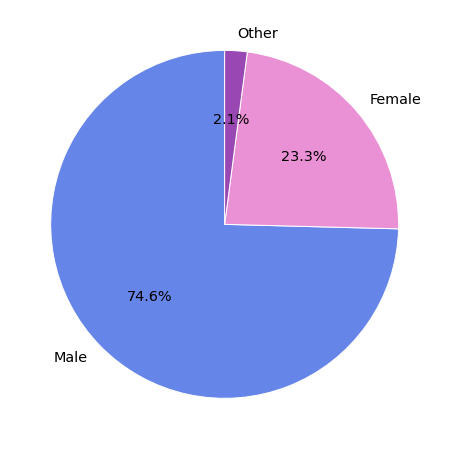

In [417]:
gender=df.member_gender.value_counts()
colors=['#6685E8','#EA91D5','#9948B3']
labels= ['Male','Female','Other']
plt.figure(figsize=(8,8))
plt.pie(gender,labels=labels, autopct='%1.1f%%',wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},textprops={'size': 'x-large'}, colors= colors,startangle=90);

In [ ]:
plt.pie(gender, labels=['Customer','Subscriber'],autopct='%1.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},textprops={'size': 'x-large'},colors=['#5AADEA','#06B416']);

## Heatmap of days/hours

In [433]:
df['hour'] = df['start_time'].apply(lambda time: time.hour)

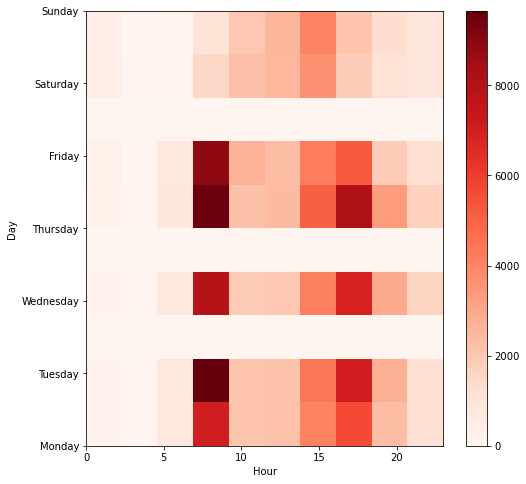

In [458]:
day_num=df["start_time"].dt.weekday
y_labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=[8,8])
plt.hist2d(df['hour'],day_num,cmap=plt.cm.Reds)
plt.yticks([0,1,2,3,4,5,6], labels=y_labels)
plt.colorbar()
plt.xlabel('Hour')
plt.ylabel('Day')
plt.show()

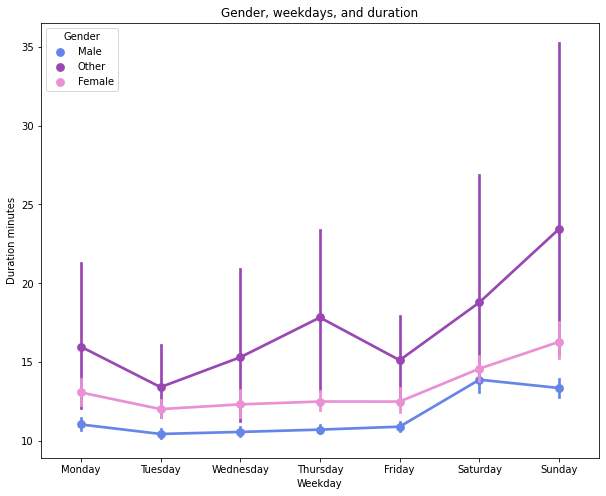

In [429]:
days_labels= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
order_d= days_labels
plt.figure(figsize=[10, 8])
sb.pointplot(data = df, x = 'day_start', y = 'duration_min', hue = 'member_gender',palette=['#6685E8','#9948B3','#EA91D5'], order=order_d).set(title='Gender, weekdays, and duration', xlabel='Weekday', ylabel='Duration minutes')
plt.legend(title='Gender')
plt.xticks(np.arange(0, 6 + 1, 1),days_labels)
plt.show()

## Stations age/gender/station

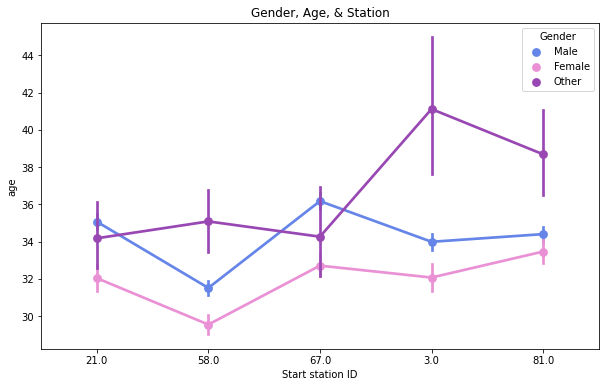

In [459]:
plt.figure(figsize=[10,6])
sb.pointplot(data=pop_stations_start, x='start_station_id', y='age', hue='member_gender', palette=['#6685E8','#EA91D5','#9948B3']).set(title='Gender, Age, & Station', xlabel='Start station ID');
plt.legend(title='Gender')
plt.show()

## Stations and user type
It would be important to gather more data in subscribers to understand what is driving them to rent from these stations and how we could leverage that information to attract more subscribers.

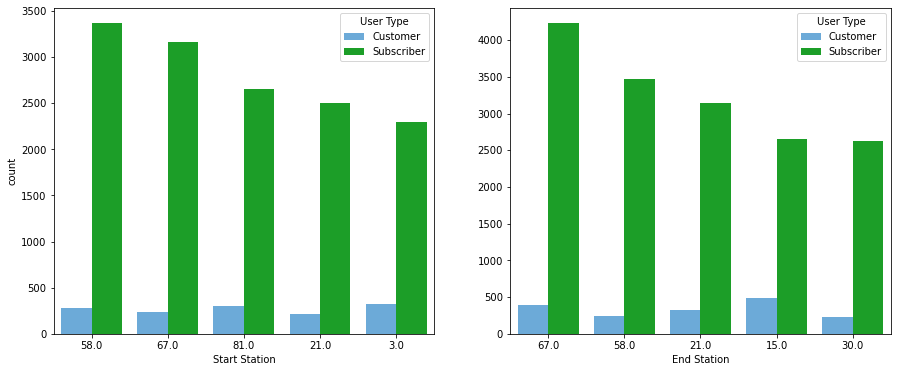

In [460]:
order_s= ['58.0','67.0','81.0','21.0','3.0']
order_e=['67.0','58.0','21.0','15.0','30.0']
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sb.countplot(data=pop_stations_start,x='start_station_id', hue='user_type', order=order_s,palette=['#5AADEA','#06B416'])
plt.legend(title='User Type')
plt.xlabel('Start Station')
plt.subplot(1,2,2)
sb.countplot(data=pop_stations_end,x='end_station_id', hue='user_type',order=order_e, palette=['#5AADEA','#06B416'])
plt.legend(title='User Type')
plt.xlabel('End Station')
plt.ylabel('')
plt.show()